In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
dt = pd.read_csv("../ML_Codons_Technology/DataSets/Train_schedule.csv")
df = pd.read_csv("../ML_Codons_Technology/DataSets/Railway_info.csv")

In [3]:
dt.head()

,SN,Train_No,Station_Code,1A,2A,3A,SL,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance
0,1,107,SWV,100,100,100,100,SAWANTWADI R,1,00:00:00,10:25:00,0
1,2,107,THVM,260,228,196,164,THIVIM,1,11:06:00,11:08:00,32
2,3,107,KRMI,345,296,247,198,KARMALI,1,11:28:00,11:30:00,49
3,4,107,MAO,490,412,334,256,MADGOAN JN.,1,12:10:00,00:00:00,78
4,1,108,MAO,100,100,100,100,MADGOAN JN.,1,00:00:00,20:30:00,0


In [4]:
df.head()

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
0,107,SWV-MAO-VLNK,SAWANTWADI ROAD,MADGOAN JN.,Saturday
1,108,VLNK-MAO-SWV,MADGOAN JN.,SAWANTWADI ROAD,Friday
2,128,MAO-KOP SPEC,MADGOAN JN.,CHHATRAPATI SHAHU MAHARAJ TERMINUS,Friday
3,290,PALACE ON WH,DELHI-SAFDAR JANG,DELHI-SAFDAR JANG,Wednesday
4,401,BSB BHARATDA,AURANGABAD,VARANASI JN.,Saturday


In [5]:
df.Source_Station_Name.unique()

array(['SAWANTWADI ROAD', 'MADGOAN JN.', 'DELHI-SAFDAR JANG',
       'AURANGABAD', 'LUCKNOW JN.', 'SHRI MATA VAISHNO DEVI KATRA',
       'SIRSA', 'RAJENDRANAGAR TERMINAL', 'PATNA JN.', 'URKURA',
       'NEW DELHI', 'CST-MUMBAI', 'LOKMANYA TILAK TERMINUS', 'AJNI',
       'KARMALI', 'NAGPUR JN.(CR)', 'PUNE JN.', 'MANGALORE JN',
       'JABALPUR', 'BANDRA TERMINUS', 'ATARI JN', 'SANTRAGACHI JN.',
       'REWA', 'BHOPAL', 'TRIVANDRUM CENTRAL', 'PALANI', 'POLLACHI',
       'HYDERABAD DECCAN', 'JAIPUR JN.', 'RAJKOT', 'CHENNAI CENTRAL',
       'HATIA', 'KOLKATA', 'PURI', 'ASANSOL MAIN', 'DHANBAD JN.',
       'KUSUNDA', 'SONARDIH', 'PHULWARTANR', 'JASIDIH JN.',
       'ANAND VIHAR TERMINAL', 'DELHI JN.', 'HAZRAT NIZAMUDDIN JN',
       'BIKANER JN.', 'HARIDWAR JN', 'HANUMANGARH JN.', 'SHRI GANGANAGAR',
       'SADULPUR JN', 'SURATGARH JN.', 'PARVATSAR CITY', 'MAKRANA JN.',
       'JODHPUR JN.', 'MERTA ROAD JN.', 'RATANAGARH JN', 'CHURU',
       'SAHARANPUR JN.', 'AMBALA CANTT JN', 'PATHANKOT JN

In [6]:
dt = dt.drop(columns=["1A","2A","3A","SL"],axis = 1)


In [7]:
dt["Arrival_time"] = dt["Arrival_time"].replace('[:]','',regex =True)
dt["Departure_Time"] = dt["Departure_Time"].replace("[:]",'', regex = True)

In [8]:
dt.head()

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance
0,1,107,SWV,SAWANTWADI R,1,000000,102500,0
1,2,107,THVM,THIVIM,1,110600,110800,32
2,3,107,KRMI,KARMALI,1,112800,113000,49
3,4,107,MAO,MADGOAN JN.,1,121000,000000,78
4,1,108,MAO,MADGOAN JN.,1,000000,203000,0


In [9]:
dt.Arrival_time = dt.Arrival_time.astype("int64")
dt.Departure_Time = dt.Departure_Time.astype("int64")

In [10]:
dt['Station_Name'] = dt['Station_Name'].replace("[' ','.']","",regex = True)

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186074 entries, 0 to 186073
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   SN              186074 non-null  int64 
 1   Train_No        186074 non-null  int64 
 2   Station_Code    186074 non-null  object
 3   Station_Name    186074 non-null  object
 4   Route_Number    186074 non-null  int64 
 5   Arrival_time    186074 non-null  int64 
 6   Departure_Time  186074 non-null  int64 
 7   Distance        186074 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 11.4+ MB


In [12]:
def time(x):
    if x >= 0 and x < 50000:
        return 'Mid_night'
    elif x >=50000 and x < 80000:
        return 'Early_morning'
    elif x >= 80000 and x < 120000:
        return 'Morning'
    elif x >= 120000 and x < 170000:
        return 'Afternoon'
    elif x >= 170000 and x < 200000:
        return 'Evening'
    else:
        return 'Night'
    
dt['Time'] = dt.Departure_Time.apply(time)

In [13]:
dt

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance,Time
0,1,107,SWV,SAWANTWADIR,1,0,102500,0,Morning
1,2,107,THVM,THIVIM,1,110600,110800,32,Morning
2,3,107,KRMI,KARMALI,1,112800,113000,49,Morning
3,4,107,MAO,MADGOANJN,1,121000,0,78,Mid_night
4,1,108,MAO,MADGOANJN,1,0,203000,0,Night
...,...,...,...,...,...,...,...,...,...
186069,1,22439,NDLS,NEWDELHI,1,0,60000,0,Early_morning
186070,2,22439,UMB,AMBALACANTJN,1,80800,81000,199,Morning
186071,3,22439,LDH,LUDHIANAJN,1,91900,92100,312,Morning
186072,4,22439,JAT,JAMMUTAWI,1,123800,124000,577,Afternoon


In [14]:
cols = dt.iloc[:,2:3].columns.tolist()
for i in cols:
    print("column:", i)
    print("unique values", dt[i].unique().tolist())
    print("")
    

column: Station_Code
unique values ['SWV', 'THVM', 'KRMI', 'MAO', 'KUDL', 'SNDD', 'KKW', 'VBW', 'RAJP', 'RN', 'SGR', 'CHI', 'KHED', 'MNI', 'ROHA', 'PNVL', 'KJT', 'LNL', 'PUNE', 'STR', 'MRJ', 'KOP', 'DSJ', 'GADJ', 'JP', 'DPA', 'SWM', 'COR', 'UDZ', 'JSM', 'MDB', 'FL', 'BTE', 'IDH', 'AGC', 'AWB', 'MMR', 'BSL', 'KNW', 'JHS', 'CNB', 'LKO', 'BBK', 'AY', 'SHG', 'JNU', 'BSB', 'FGR', 'KSJ', 'BE', 'SVDK', 'SSA', 'HSR', 'BNW', 'ROK', 'MGS', 'RJPB', 'SNP', 'PNP', 'KUN', 'KKDE', 'UMB', 'PNBE', 'BTI', 'PTA', 'URK', 'PJP', 'ASR', 'CSMT', 'DR', 'TNA', 'KYN', 'IGP', 'NK', 'JL', 'MKU', 'SEG', 'AK', 'MZR', 'BD', 'DMN', 'PLO', 'WR', 'NGP', 'LTT', 'AJNI', 'CSN', 'KAWR', 'KT', 'KUDA', 'UD', 'MULK', 'MAJN', 'MTJ', 'GWL', 'BPL', 'ET', 'DD', 'KK', 'ANG', 'KPG', 'HD', 'PPI', 'NU', 'MML', 'JBP', 'BDTS', 'BVI', 'VAPI', 'ST', 'BRC', 'RTM', 'UJN', 'BIH', 'HBD', 'KMZ', 'DMO', 'SGO', 'MAKR', 'LAR', 'NDLS', 'LDH', 'JUC', 'BEAS', 'ATT', 'SHR', 'KTE', 'UMR', 'SDL', 'APR', 'PND', 'BSP', 'CPH', 'RIG', 'JSG', 'ROU', 'CKP',

In [15]:
dt[dt.Station_Code == "JP"].head()

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance,Time
32,3,290,JP,JAIPURJN,1,80000,115500,311,Morning
530,29,2731,JP,JAIPURJN,1,62500,62500,1854,Early_morning
531,1,2732,JP,JAIPURJN,1,143500,143500,0,Afternoon
3818,24,8061,JP,JAIPURJN,1,63500,63500,1847,Early_morning
3819,1,8062,JP,JAIPURJN,1,124500,124500,0,Afternoon


In [16]:
ss = dt[(dt.Station_Name == 'MADGOANJN')]
ss.head()

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance,Time
3,4,107,MAO,MADGOANJN,1,121000,0,78,Mid_night
4,1,108,MAO,MADGOANJN,1,0,203000,0,Night
8,1,128,MAO,MADGOANJN,1,194000,194000,0,Evening
247,11,1301,MAO,MADGOANJN,1,62000,63000,657,Early_morning
260,7,1302,MAO,MADGOANJN,1,221000,222000,320,Night


In [17]:
uu = ss.Train_No.unique()

In [18]:
ttt = dt[dt.Train_No.isin(uu)]
ttt.head(10)

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance,Time
0,1,107,SWV,SAWANTWADIR,1,0,102500,0,Morning
1,2,107,THVM,THIVIM,1,110600,110800,32,Morning
2,3,107,KRMI,KARMALI,1,112800,113000,49,Morning
3,4,107,MAO,MADGOANJN,1,121000,0,78,Mid_night
4,1,108,MAO,MADGOANJN,1,0,203000,0,Night
5,2,108,KRMI,KARMALI,1,210400,210600,33,Night
6,3,108,THVM,THIVIM,1,212600,212800,51,Night
7,4,108,SWV,SAWANTWADIR,1,222500,0,83,Mid_night
8,1,128,MAO,MADGOANJN,1,194000,194000,0,Evening
9,2,128,KRMI,KARMALI,1,201800,202000,33,Night


In [19]:
ttt.Station_Name.unique()

array(['SAWANTWADIR', 'THIVIM', 'KARMALI', 'MADGOANJN', 'KUDAL',
       'SINDHUDURG', 'KANKAVALI', 'VAIBHAVWADI', 'RAJAPURROAD',
       'RATNAGIRI', 'SANGMESHWAR', 'CHIPLUN', 'KHED', 'MANGAON', 'ROHA',
       'PANVEL', 'KARJAT', 'LONAVLA', 'PUNEJN', 'SATARA', 'MIRAJJN',
       'CHHATRAPATI', 'KAWR', 'KUMTA', 'KUNDAPURA', 'UDUPI', 'MULKI',
       'MANGALOREJN', 'VASAIROAD', 'SURAT', 'VADODARAJN', 'RATLAMJN',
       'KOTA', 'HAZRATNIZAM', 'DELHI-SAFDAR', 'MATHURAJN', 'AGRACANTT',
       'GWALIORJN', 'JHANSIJN', 'BHOPAL', 'ITARSI', 'KHANDWAJN',
       'BHUSAVALJN', 'MANMADJN', 'NASIKROAD', 'IGATPURI', 'PAYYANUR',
       'CST-MUMBAI', 'DADAR', 'THANE', 'ADAVALI', 'PERNEM', 'VILAVADE',
       'BHATKAL', 'KASARAGOD', 'KANNUR', 'CALICUT', 'TIRUR', 'SHORANURJN',
       'TRICHUR', 'ALWAYE', 'ERNAKULAMJ', 'LOKMANYATIL', 'KARAD',
       'SANGLI', 'GHATPRABHA', 'BELGAUM', 'LONDAJN', 'CASTLEROCK',
       'KULEM', 'SANVORDEMCU', 'GOKARNAROAD', 'HONNAVAR', 'MURDESHWAR',
       'KANHANGAD', 'THALASSER

In [20]:
dd = ttt[(ttt.Station_Name == 'AMRITSARJN')]

In [21]:
dee = dd.Train_No.unique()
dee

array([12483, 12484], dtype=int64)

In [22]:
trr = df[df.Train_No.isin(dee)]
trr

,Train_No,Train_Name,Source_Station_Name,Destination_Station_Name,days
878,12483,KCVL EXPRESS,KOCHUVELI,AMRITSAR JN.,Thursday
879,12484,KCVL EXPRESS,AMRITSAR JN.,KOCHUVELI,Monday


In [23]:
tndd = dt[(dt.Train_No == 12483)]
tndd

,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance,Time
14900,1,12483,KCVL,KOCHUVELI,1,92000,92000,0,Morning
14901,2,12483,QLN,QUILON,1,102000,102500,58,Morning
14902,3,12483,KYJ,KAYANKULAMJ,1,110300,110500,99,Morning
14903,4,12483,ALLP,ALLEPPEY,1,114000,114300,142,Morning
14904,5,12483,ERS,ERNAKULAMJ,1,125500,130000,199,Afternoon
14905,6,12483,TCR,TRICHUR,1,140500,140800,273,Afternoon
14906,7,12483,SRR,SHORANURJN,1,150000,150500,306,Afternoon
14907,8,12483,CLT,CALICUT,1,162000,162500,392,Afternoon
14908,9,12483,CAN,KANNUR,1,175000,175500,481,Evening
14909,10,12483,KGQ,KASARAGOD,1,184800,185000,567,Evening


NameError: name 'trainnoo' is not defined

In [25]:
dt['Time'] = dt.Departure_Time.apply(time)

In [26]:
# stn = input("Enter the Source_Station_Name ")

# s = dt[(dt.Station_Name == stn)]

# u = s.Train_No.unique()

# tt = dt[dt.Train_No.isin(u)]

# a = tt.Station_Name.unique()

# a.sort()

# print("\n\nAvailable destinations are ",a)

# dtn = input("\n\nEnter the Destination_Station_Name ")

# d = tt[(tt.Station_Name == dtn)]

# de = d.Train_No.unique()

# tr = df[df.Train_No.isin(de)]

# print("\n\nAvailable Trains are :")
# tr = tr.set_index('Train_No')
# print("")

# di = []
# for i in tr.index:
#     dista = dt[dt['Train_No'] == i]
#     dista['Your_distance'] = 0
#     sorc = dista[dista['Station_Name'] == stn]
#     destina = dista[dista['Station_Name'] == dtn]
#     distance = destina.Distance.unique() - sorc.Distance.unique()
#     distance = int(distance)
#     dista.Your_distance = dista.Your_distance.replace({0:distance})
#     if(distance<=0):
#         tr = tr.drop([i], axis = 0)
#     else:
#         di.append(distance)
# print(di)
# tr = tr.reset_index()
# print(tr)

# plt.figure(figsize=[10 ,5])
# sb.barplot(tr.Train_No, di)
# plt.xticks(rotation = 90)
# plt.ylabel('Distance From source->destination')
# plt.title('Distance to be covered by train')
# plt.show()

# cpp = dt[(dt.Train_No.isin(de))]
# sy = cpp[cpp.Station_Name == stn]
# plt.figure(figsize=[10 ,5])
# sb.barplot(sy.Train_No,sy.Departure_Time)
# plt.xticks(rotation = 90) 
# plt.show()





# print("")
# tno = int(input('Enter train number: '))
# print("")
# sorcdest = df[df['Train_No']==tno]
# trainno  = dt[dt['Train_No'] == tno]
    
# print('Train name: ',sorcdest.Train_Name.unique())
# print("")
# print('Route: ',sorcdest.Source_Station_Name.unique(),"--->",sorcdest.Destination_Station_Name.unique())
# print("")

# print('Stations: ',trainno.Station_Name.unique())
# print("")
# print("Your Route: ", stn , "--->",dtn)
# print("")
    
    

# print("")
# strt_pt = stn

# dest = dtn
# print("")
# src = trainno[trainno['Station_Name'] == strt_pt]
# dst = trainno[trainno['Station_Name'] == dest]
    

    
# distance =  dst.Distance.unique() - src.Distance.unique()
# print("Distance: ",distance, 'Time: ' , src.Time.unique(),' ',src.Departure_Time.unique())
# print("")
# trainno



Enter the Source_Station_Name PUNEJN


Available destinations are  ['ABUROAD' 'ADARKI' 'ADILABAD' 'ADIPUR' 'ADONI' 'AGRACANTT' 'AHMADNAGAR'
 'AHMEDABAD' 'AJMERJN' 'AJNI' 'AKALKOTROAD' 'AKIVIDU' 'AKOLAJN' 'AKOLNER'
 'AKURDI' 'ALANDI' 'ALLAHABADCI' 'ALLAHABADJN' 'ALLEPPEY' 'ALMATTI'
 'ALNAVARJN' 'ALWAYE' 'AMBALACANTT' 'AMBALACITY' 'AMBALAPUZHA' 'AMBERNATH'
 'AMBLE' 'AMLAJN' 'AMNAPUR' 'AMRAVATI' 'ANAKAPALLE' 'ANANDJN' 'ANANTAPUR'
 'ANGAMALI(FO' 'ANGAR' 'ANJAR' 'ANKAI' 'ANKLESHWARJ' 'ARA' 'ARAKKONAMJN'
 'ARIYALUR' 'ARNIROAD' 'ARSIKEREJN' 'AUNRIHARJN' 'AURANGABAD' 'BABINA'
 'BADAMI' 'BADLAPUR' 'BADNAPUR' 'BADNERAJN' 'BAGALKOT' 'BALE' 'BALHARSHAH'
 'BALLIA' 'BALOTRAJN' 'BALUGAN' 'BANAPURA' 'BANASTHALIN' 'BANASWADI'
 'BANGALORECA' 'BANGALOREEA' 'BANGARPETJN' 'BARAMATI' 'BARMER' 'BARSHI'
 'BASAR' 'BASTI' 'BAYTU' 'BEAWAR' 'BEGAMPET' 'BEGDAEWAI' 'BELAPUR'
 'BELGAUM' 'BELLARYJN' 'BELVANDI' 'BERHAMPUR' 'BETUL' 'BHABUAROAD'
 'BHACHAU' 'BHAGAT-KI-KO' 'BHALKI' 'BHALWANI' 'BHANDARARD' 'BHARUCHJN'
 'BH



Enter the Destination_Station_Name KALYANJN


Available Trains are :

    Train_No    Train_Name                              Source_Station_Name  \
0       2821   PUNE-SRC AC                                         PUNE JN.   
1      11006  CHALUKYA EXP                                      PONDICHERRY   
2      11008  DECCAN EXPRE                                         PUNE JN.   
3      11010  SINHAGAD EXP                                         PUNE JN.   
4      11012  NED-LTT  EXP                                           NANDED   
5      11014   LOKMANYA TT                                  COIMBATORE  JN.   
6      11018  KARAIKAL LTT                                         KARAIKAL   
7      11020  KONARK EXPRE                                      BHUBANESWAR   
8      11022  TEN - DR EXP                                   TIRUNELVELI JN   
9      11024  SAHYADRI EXP               CHHATRAPATI SHAHU MAHARAJ TERMINUS   
10     11026  PUNE-BSL EXP                                 

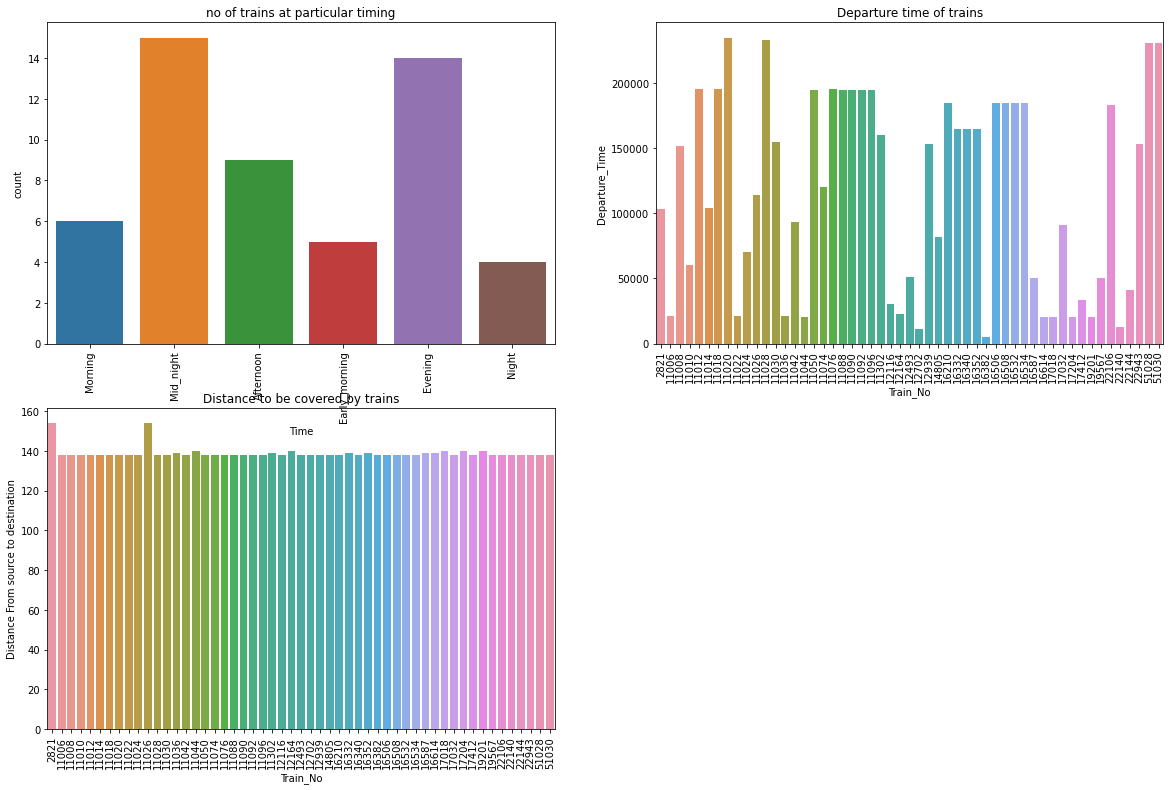

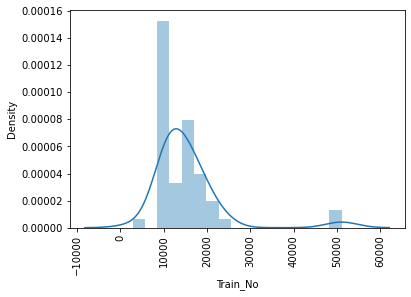


Enter train number: 17018

Train name:  ['SC-RJT EXP']

Route:  ['SECUNDERABAD JN.'] ---> ['RAJKOT']

Stations:  ['SECUNDERABAD' 'BEGAMPET' 'TANDUR' 'SERAM' 'CHITTAPUR' 'WADIJN'
 'GULBARGA' 'SOLAPUR' 'DAUNDJN' 'PUNEJN' 'LONAVLA' 'KARJAT' 'KALYANJN'
 'BHIWANDIROA' 'VASAIROAD' 'VAPI' 'VALSAD' 'SURAT' 'ANKLESHWARJ'
 'VADODARAJN' 'ANANDJN' 'NADIADJN' 'MANINAGAR' 'AHMEDABAD' 'VIRAMGAMJN'
 'SURENDRANAGA' 'WANKANER' 'RAJKOT']

Your Route:  PUNEJN ---> KALYANJN



Distance:  [140]    Time:  ['Mid_night']  [20500]



,SN,Train_No,Station_Code,Station_Name,Route_Number,Arrival_time,Departure_Time,Distance,Time
45612,1,17018,SC,SECUNDERABAD,1,150000,150000,0,Afternoon
45613,2,17018,BMT,BEGAMPET,1,150800,151000,4,Afternoon
45614,3,17018,TDU,TANDUR,1,165500,165600,113,Afternoon
45615,4,17018,SEM,SERAM,1,172400,172500,146,Evening
45616,5,17018,CT,CHITTAPUR,1,174900,175000,168,Evening
45617,6,17018,WADI,WADIJN,1,184000,184500,183,Evening
45618,7,17018,GR,GULBARGA,1,192200,192500,220,Evening
45619,8,17018,SUR,SOLAPUR,1,211500,212500,333,Night
45620,9,17018,DD,DAUNDJN,1,2500,3000,521,Mid_night
45621,10,17018,PUNE,PUNEJN,1,20000,20500,598,Mid_night


In [33]:
stn = input("Enter the Source_Station_Name ")

s = dt[(dt.Station_Name == stn)]

u = s.Train_No.unique()

tt = dt[dt.Train_No.isin(u)]

a = tt.Station_Name.unique()

a.sort()

print("\n\nAvailable destinations are ",a)

dtn = input("\n\nEnter the Destination_Station_Name ")

d = tt[(tt.Station_Name == dtn)]

de = d.Train_No.unique()

tr = df[df.Train_No.isin(de)]

print("\n\nAvailable Trains are :")
tr = tr.set_index('Train_No')
print("")

di = []
for i in tr.index:
    dista = dt[dt['Train_No'] == i]
    sorc = dista[dista['Station_Name'] == stn]
    destina = dista[dista['Station_Name'] == dtn]
    distance = destina.Distance.unique() - sorc.Distance.unique()
    distance = int(distance)
    if(distance<=0):
        tr = tr.drop([i], axis = 0)
    else:
        di.append(distance)

tr = tr.reset_index()
print(tr)

fig = plt.figure(figsize=[20 ,13])

p1 = fig.add_subplot(223)
sb.barplot(tr.Train_No, di)
plt.xticks(rotation = 90)
plt.ylabel('Distance From source to destination')
plt.title('Distance to be covered by trains')



cpp = dt[(dt.Train_No.isin(tr.Train_No.unique()))]
sy = cpp[cpp.Station_Name == stn]
p2 = fig.add_subplot(222)
sb.barplot(sy.Train_No,sy.Departure_Time)
plt.xticks(rotation = 90)
plt.title('Departure time of trains')


aa = tr.Train_No.unique()
bb = dt[(dt.Train_No.isin(aa))]
dd = bb[(bb.Station_Name == stn)]
p3 = fig.add_subplot(221)
plt.title('no of trains at particular timing')
sb.countplot(dd.Time)
plt.xticks(rotation = 90)
plt.show()



p4 = fig.add_subplot(224)
sb.distplot(tr.Train_No)
plt.xticks(rotation = 90) 

plt.show()







print("")
tno = int(input('Enter train number: '))
print("")
sorcdest = df[df['Train_No']==tno]
trainno  = dt[dt['Train_No'] == tno]
    
print('Train name: ',sorcdest.Train_Name.unique())
print("")
print('Route: ',sorcdest.Source_Station_Name.unique(),"--->",sorcdest.Destination_Station_Name.unique())
print("")

print('Stations: ',trainno.Station_Name.unique())
print("")
print("Your Route: ", stn , "--->",dtn)
print("")
    
    

print("")
strt_pt = stn

dest = dtn
print("")
src = trainno[trainno['Station_Name'] == strt_pt]
dst = trainno[trainno['Station_Name'] == dest]
    

    
distance =  dst.Distance.unique() - src.Distance.unique()
print("Distance: ",distance, '   Time: ' , src.Time.unique(),'',src.Departure_Time.unique())
print("")
trainno




